# Normality 

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

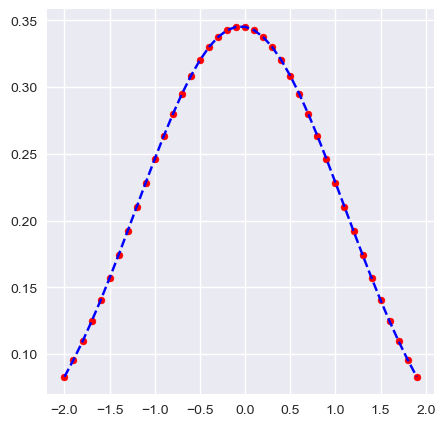

In [5]:
# Normal distribution - (How to draw normal distribution)
def pdf(x):
    mean = np.mean(x)
    std = np.std(x)
    y_out = 1 / (std * np.sqrt(2 * np.pi)) * np.exp(- (x - mean) ** 2 / (2* std**2))
    return y_out

# To generate an array of x
x = np.arange(-2, 2, 0.1)
y = pdf(x)

# Plotting the normal curve / bell curve or gaussian distribution
plt.style.use('seaborn')
plt.figure(figsize=(5, 5))

plt.plot(x, y, color='blue', linestyle='dashed')

plt.scatter(x, y, marker='o', s=25, color='red')

## Normal Distribution and it's tests - (for numerical values)
1. import dataset
2. subsetting a dataset
3. visual test for normal distribution
4. statistical test
   1. 

In [6]:
# Import a dataset
df = sns.load_dataset('titanic')
df.shape

(891, 15)

In [7]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [10]:
# Subsetting a dataset
df = df[['sex', 'age', 'fare']]
df.head()

,sex,age,fare
0,male,22.0,7.2500
1,female,38.0,71.2833
2,female,26.0,7.9250
3,female,35.0,53.1000
4,male,35.0,8.0500


<AxesSubplot:ylabel='Count'>

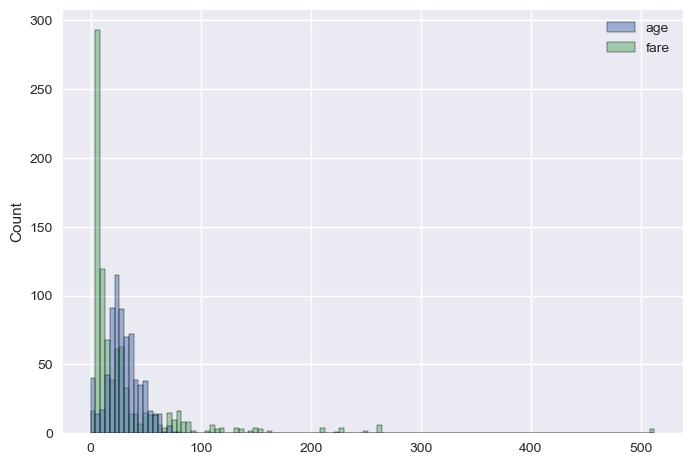

In [15]:
# Visualization - histogram test
sns.histplot(df[['age', 'fare']])

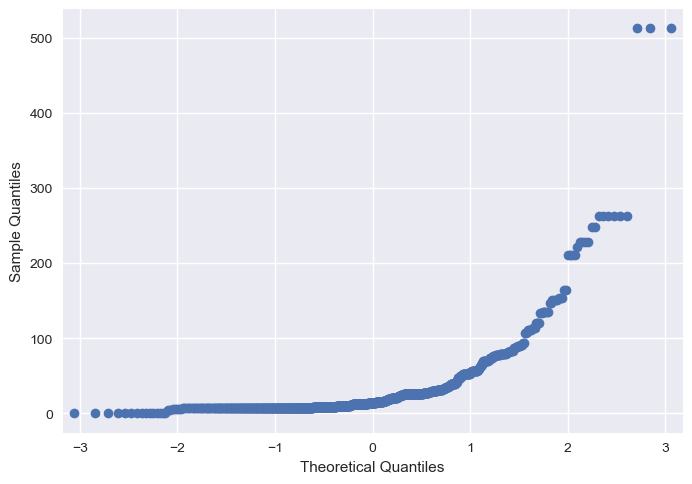

In [17]:
# Visualization - qq plot
from statsmodels.graphics.gofplots import qqplot
# qq norm plot
qqplot(df['fare'])
plt.show()

# **1. Normality Tests**
There are many statistical tests that we can use to quantify whether a sample of data looks as though it was drawn from a Gaussian distribution.\
1. Shapiro Wilk Test
2. D'Agostino's K^2 Test
3. Anderson-Darling Test\
> **p <= alpha reject H0, not normal**\
> **p > alpha failt to reject H0, normal**.

### 1. Shapiro-Wilk Test
The Shapiro-Wilk test evaluates a data sample and quantifies how likely it is that the data was drawn from a Gaussian distribution, named for Samuel Shapiro and Martin Wilk.

In practice, the Shapiro-Wilk test is believed to be a reliable test of normality, although there is some suggestion that the test may be suitable for smaller samples of data, e.g. thousands of observations or fewer.

The shapiro() SciPy function will calculate the Shapiro-Wilk on a given dataset. The function returns both the W-statistic calculated by the test and the p-value.

Assumptions

Observations in each sample are independent and identically distributed.\
Interpretation

H0: the sample has a Gaussian distribution.\
H1: the sample does not have a Gaussian distribution.


Python code is here:

In [24]:
# Shapiro Wilk Test

# import libraries
from scipy.stats import shapiro
stat, p = shapiro(df['age'])

print('stat=%.3f, p=%.3f' % (stat, p))

# Make a conditional argument
if p > 0.05:
    print('Probably Gaussian or Normal Distribution')
else: 
    print('Probably not Gaussian nor Normal Distribution')

stat=nan, p=1.000
Probably Gaussian or Normal Distribution


### 2. D’Agostino’s K^2 Test
The D’Agostino’s K^2 test calculates summary statistics from the data, namely kurtosis and skewness, to determine if the data distribution departs from the normal distribution, named for Ralph D’Agostino.

Skew is a quantification of how much a distribution is pushed left or right, a measure of asymmetry in the distribution.
Kurtosis quantifies how much of the distribution is in the tail. It is a simple and commonly used statistical test for normality.
The D’Agostino’s K^2 test is available via the normaltest() SciPy function and returns the test statistic and the p-value. Assumptions

Observations in each sample are independent and identically distributed.\
Interpretation

H0: the sample has a Gaussian distribution.\
H1: the sample does not have a Gaussian distribution.


Python code is here:

In [26]:
# D'Agostinio's K^2 Test

# import libraries
from scipy.stats import normaltest
stat, p = normaltest(df['age'])

print('stat=%.3f, p=%.3f' % (stat, p))

# Make a conditional argument
if p > 0.05:
    print('Probably Gaussian or Normal Distribution')
else: 
    print('Probably not Gaussian nor Normal Distribution')

stat=nan, p=nan
Probably not Gaussian nor Normal Distribution


### 3. Anderson-Darling Test
A statistical test that can be used to evaluate whether a data sample comes from one of among many known data samples, named for Theodore Anderson and Donald Darling.

It can be used to check whether a data sample is normal. The test is a modified version of a more sophisticated nonparametric goodness-of-fit statistical test called the Kolmogorov-Smirnov test.

A feature of the Anderson-Darling test is that it returns a list of critical values rather than a single p-value. This can provide the basis for a more thorough interpretation of the result.

The anderson() SciPy function implements the Anderson-Darling test. It takes as parameters the data sample and the name of the distribution to test it against. By default, the test will check against the Gaussian distribution (dist=’norm’).

Assumptions

Observations in each sample are independent and identically distributed.
Interpretation

H0: the sample has a Gaussian distribution.\
H1: the sample does not have a Gaussian distribution.\


Python code is here:

In [27]:
# Anderson-Darling Test
from scipy.stats import anderson

# select a column to check the normal distribution
result = anderson(df['age'])
print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < cv:
		print('Probably Gaussian/Normal Distribution at the %.1f%% level' % (sl))
	else:
		print('Probably not Gaussian/Normal Distribution at the %.1f%% level' % (sl))

stat=nan
Probably not Gaussian/Normal Distribution at the 15.0% level
Probably not Gaussian/Normal Distribution at the 10.0% level
Probably not Gaussian/Normal Distribution at the 5.0% level
Probably not Gaussian/Normal Distribution at the 2.5% level
Probably not Gaussian/Normal Distribution at the 1.0% level
